In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [4]:
flower_data=pd.read_csv('flower.csv')

In [5]:
flower_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
flower_data.shape

(150, 5)

In [7]:
flower_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
flower_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
flower_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
flower_data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [11]:
flower_data.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [12]:
flower_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [28]:
flower_data['sepal_length'].value_counts()

sepal_length
5.0    10
6.3     9
5.1     9
6.7     8
5.7     8
6.4     7
5.5     7
5.8     7
4.9     6
6.0     6
5.4     6
5.6     6
6.1     6
6.5     5
4.8     5
7.7     4
6.9     4
4.6     4
5.2     4
6.2     4
4.4     3
7.2     3
5.9     3
6.8     3
4.7     2
6.6     2
4.3     1
7.0     1
5.3     1
4.5     1
7.1     1
7.3     1
7.6     1
7.4     1
7.9     1
Name: count, dtype: int64

In [29]:
flower_data['sepal_length'].value_counts().keys()

Index([5.0, 6.3, 5.1, 6.7, 5.7, 6.4, 5.5, 5.8, 4.9, 6.0, 5.4, 5.6, 6.1, 6.5,
       4.8, 7.7, 6.9, 4.6, 5.2, 6.2, 4.4, 7.2, 5.9, 6.8, 4.7, 6.6, 4.3, 7.0,
       5.3, 4.5, 7.1, 7.3, 7.6, 7.4, 7.9],
      dtype='float64', name='sepal_length')

In [30]:
flower_data['sepal_width'].value_counts()

sepal_width
3.0    26
2.8    14
3.2    13
3.4    12
3.1    12
2.9    10
2.7     9
2.5     8
3.3     6
3.5     6
3.8     6
2.6     5
2.3     4
3.7     3
3.6     3
2.2     3
2.4     3
3.9     2
4.4     1
4.2     1
4.1     1
4.0     1
2.0     1
Name: count, dtype: int64

In [31]:
flower_data['sepal_width'].value_counts().keys()

Index([3.0, 2.8, 3.2, 3.4, 3.1, 2.9, 2.7, 2.5, 3.3, 3.5, 3.8, 2.6, 2.3, 3.7,
       3.6, 2.2, 2.4, 3.9, 4.4, 4.2, 4.1, 4.0, 2.0],
      dtype='float64', name='sepal_width')

In [32]:
flower_data['petal_length'].value_counts()

petal_length
1.5    14
1.4    12
4.5     8
5.1     8
1.3     7
1.6     7
5.6     6
4.9     5
4.0     5
4.7     5
1.7     4
4.8     4
5.0     4
4.4     4
4.2     4
4.1     3
3.9     3
5.8     3
5.7     3
5.5     3
6.1     3
4.6     3
1.9     2
5.2     2
5.4     2
1.2     2
3.3     2
3.5     2
6.7     2
5.3     2
4.3     2
5.9     2
6.0     2
1.0     1
1.1     1
3.7     1
3.8     1
3.6     1
3.0     1
6.3     1
6.6     1
6.9     1
6.4     1
Name: count, dtype: int64

In [33]:
flower_data['petal_length'].value_counts().keys()

Index([1.5, 1.4, 4.5, 5.1, 1.3, 1.6, 5.6, 4.9, 4.0, 4.7, 1.7, 4.8, 5.0, 4.4,
       4.2, 4.1, 3.9, 5.8, 5.7, 5.5, 6.1, 4.6, 1.9, 5.2, 5.4, 1.2, 3.3, 3.5,
       6.7, 5.3, 4.3, 5.9, 6.0, 1.0, 1.1, 3.7, 3.8, 3.6, 3.0, 6.3, 6.6, 6.9,
       6.4],
      dtype='float64', name='petal_length')

In [34]:
flower_data['petal_width'].value_counts()

petal_width
0.2    28
1.3    13
1.5    12
1.8    12
1.4     8
2.3     8
0.4     7
1.0     7
0.3     7
0.1     6
2.1     6
2.0     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
1.1     3
2.4     3
1.7     2
0.6     1
0.5     1
Name: count, dtype: int64

In [35]:
flower_data['petal_width'].value_counts().keys()

Index([0.2, 1.3, 1.5, 1.8, 1.4, 2.3, 0.4, 1.0, 0.3, 0.1, 2.1, 2.0, 1.2, 1.9,
       1.6, 2.5, 2.2, 1.1, 2.4, 1.7, 0.6, 0.5],
      dtype='float64', name='petal_width')

In [36]:
flower_data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [37]:
flower_data['species'].value_counts().keys()

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object', name='species')

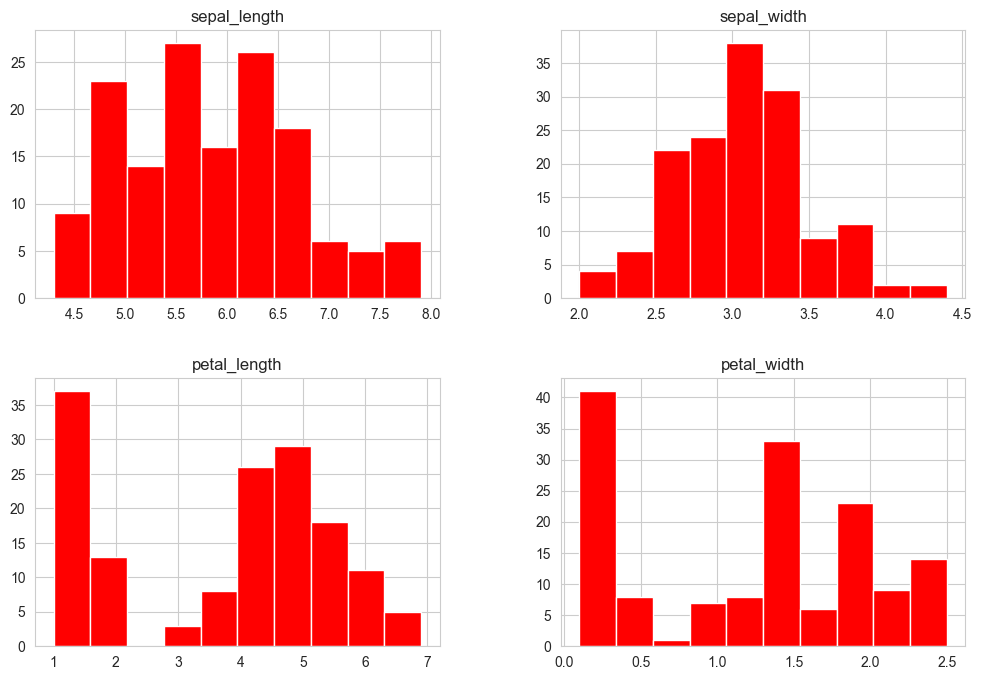

In [38]:
flower_data.hist(figsize=(12, 8),color='red')
plt.show()

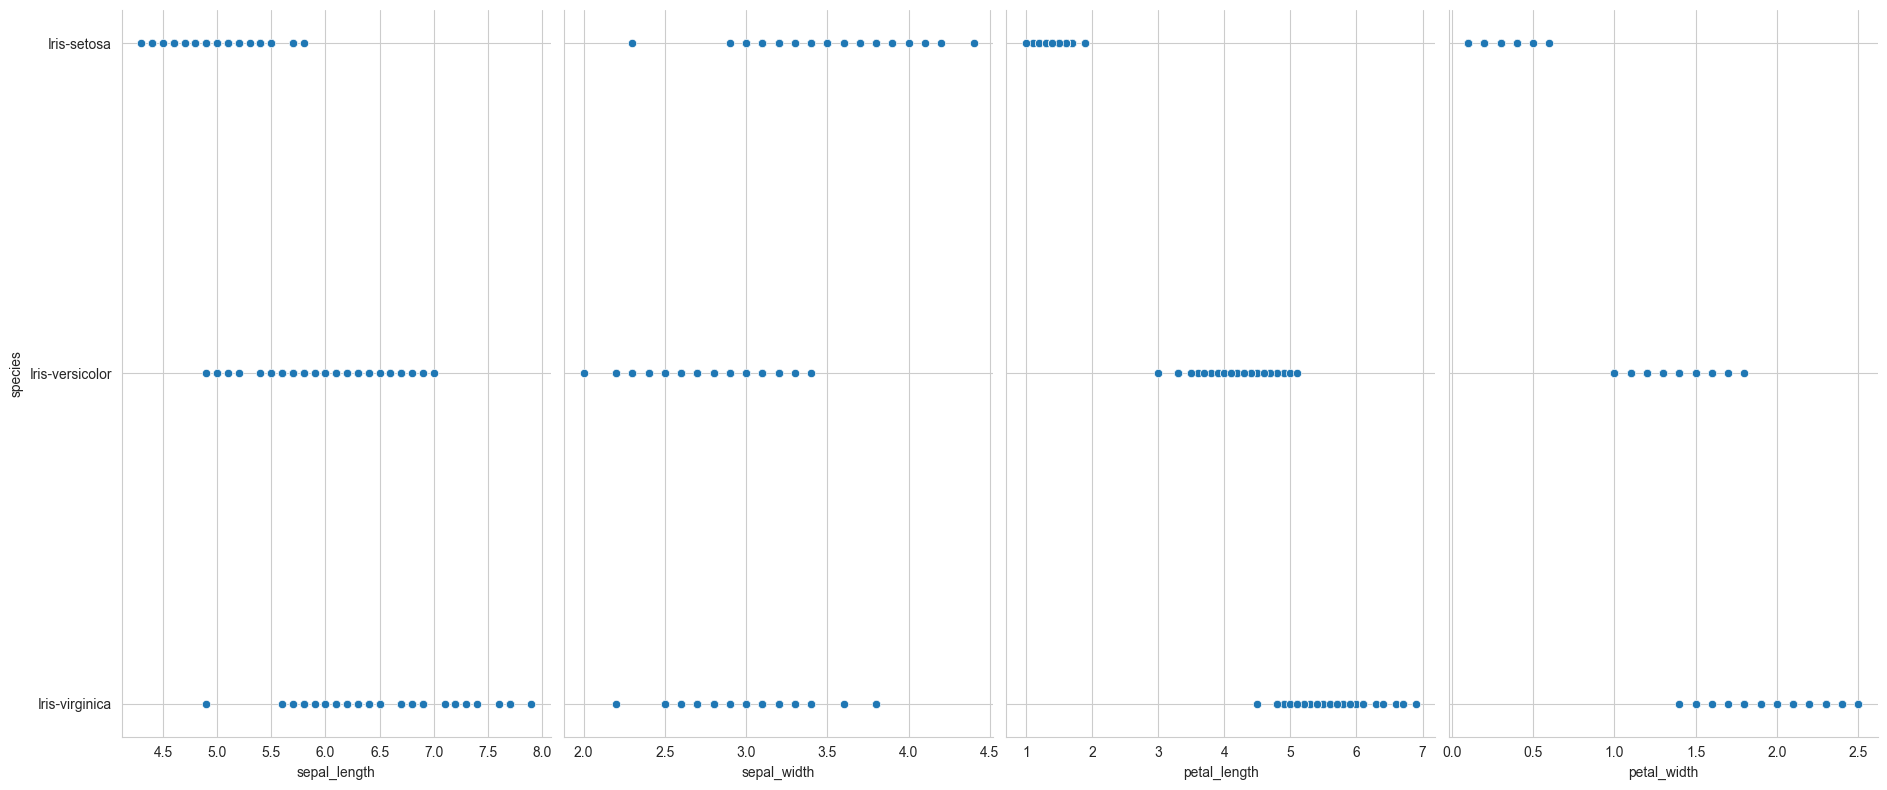

In [39]:
sns.set_style("whitegrid")
sns.pairplot(flower_data, x_vars= ['sepal_length', 'sepal_width',  'petal_length','petal_width'], y_vars= 'species', height = 8, aspect=0.6)
plt.show()

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()